In [18]:
import netCDF4
%matplotlib inline
from numpy import *
import numpy as np
#matplotlib.use('TKAgg')
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
import xarray as xr
import matplotlib.patches as mpatches
filename='MSLP_1979-2019.nc'
nc = netCDF4.Dataset(filename, 'r')
for i in nc.variables:
    print(i, nc.variables[i].units, nc.variables[i].shape)


longitude degrees_east (1440,)
latitude degrees_north (721,)
time hours since 1900-01-01 00:00:00.0 (492,)
msl Pa (492, 721, 1440)


In [87]:
data = xr.open_dataset('MSLP_1979-2019.nc')
#lons=data.variables['longitude'][:]
#lats=data.variables['latitude'][:] 
#msl=data.variables['msl'][:]
yearly_data = data.groupby('time.year').mean('time')
lons=yearly_data.variables['longitude'][:]
lats=yearly_data.variables['latitude'][:] 
msl=yearly_data.variables['msl'][:]


#a.savefig('geopotential NH.png')

C:\Users\spark\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until


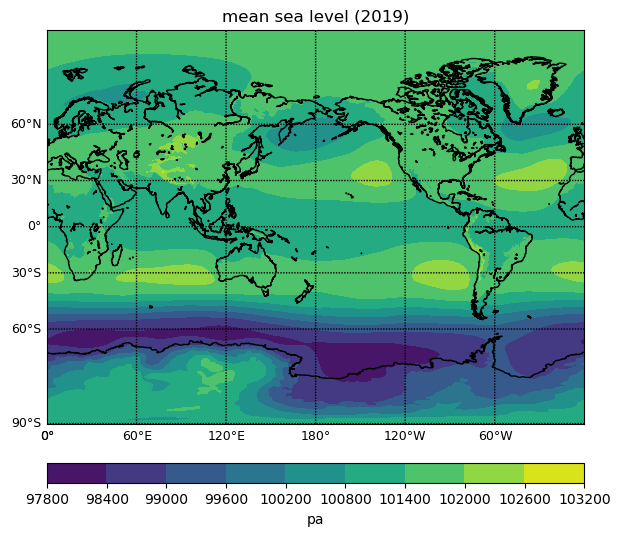

In [4]:
a=plt.figure(figsize=(12,6),dpi=100)
m = Basemap(projection='mill',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=0,urcrnrlon=360,resolution='l')
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)
cs=m.contourf(xi,yi,np.squeeze(msl[40:41,:,:]))
m.drawcoastlines()
m.drawparallels(np.arange(-90, 90, 30), labels=[1,0,0,0], fontsize=9)
m.drawmeridians(np.arange(-180, 181, 60), labels=[0,0,0,1], fontsize=9)
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label('pa')
plt.title('mean sea level (2019)')
plt.show()

In [76]:
lons

<xarray.IndexVariable 'longitude' (longitude: 1440)>
array([0.0000e+00, 2.5000e-01, 5.0000e-01, ..., 3.5925e+02, 3.5950e+02,
       3.5975e+02], dtype=float32)
Attributes:
    units:      degrees_east
    long_name:  longitude

In [72]:
data

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 492)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2019-12-01
Data variables:
    msl        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-04-21 11:53:51 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

C:\Users\spark\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


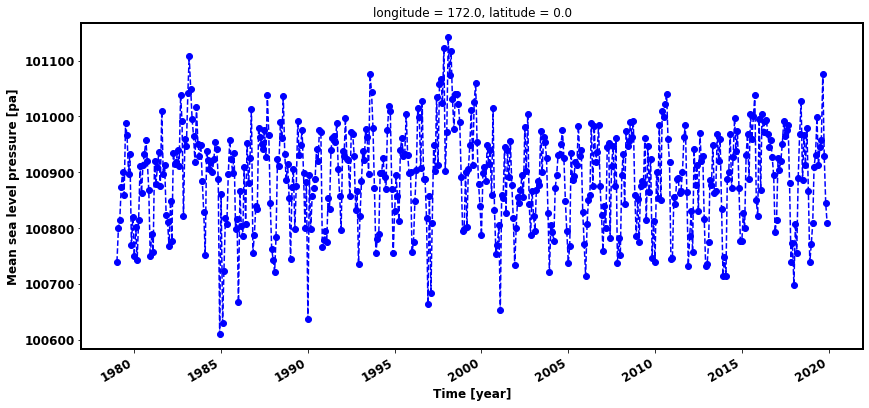

In [5]:
#time series of a location
data = xr.open_dataset('MSLP_1979-2019.nc')
#yearly_data = data.groupby('time.year').mean('time')
data_loc = data.sel(longitude=172,latitude=0,method='nearest')
plt.rcParams['axes.linewidth'] = 2 #set the value globally
data_loc['msl'].plot.line('o--',color='b',figsize=(14,6))
plt.xlabel('Time [year]',fontsize=12,fontweight='bold')
plt.xticks(fontsize=12,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')
plt.ylabel('Mean sea level pressure [pa]',fontsize=12,fontweight='bold')
plt.show()

In [20]:
# import netCDF4
# import pandas as pd
# import matplotlib.pyplot as plt

# # Data file
# data = netCDF4.Dataset('MSLP_1979-2019.nc', 'r')

# # Print variables
# par_list = data.variables.keys()
# print (par_list)

# # Read the variables
# times = data.variables['time']
# var1 = data.variables['msl']

# # Convert times
# t = netCDF4.num2date(times[:],times.units)

# hs = pd.Series(var1[:],index=dtime)
#fig = plt.figure(figsize=(12,4))
#ax = fig.add_subplot(111)
#hs.plot(ax=ax,title='Test plot')
#ax.set_ylabel(var1.units)
#plt.savefig("test.png")